Read data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("breast-cancer.csv")
data = data.drop(data.columns[0], axis=1) # drop id column

headers = data.columns.tolist()
print(headers)
print()




['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']



convert 'diagnosis' label to numerical values

In [2]:
from sklearn.preprocessing import LabelEncoder


labelEncoder = LabelEncoder()

print(data.columns[0])
labelEncoder.fit(data[data.columns[0]])
data[data.columns[0]] = labelEncoder.transform(data[data.columns[0]])

print(data)


diagnosis
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760        

check for missing data

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Check for duplicates

In [4]:
num_duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


Separate features and target variable

In [5]:
features = data.drop(columns=['diagnosis'])
label = data['diagnosis']

### correlation

Correlation Matrix

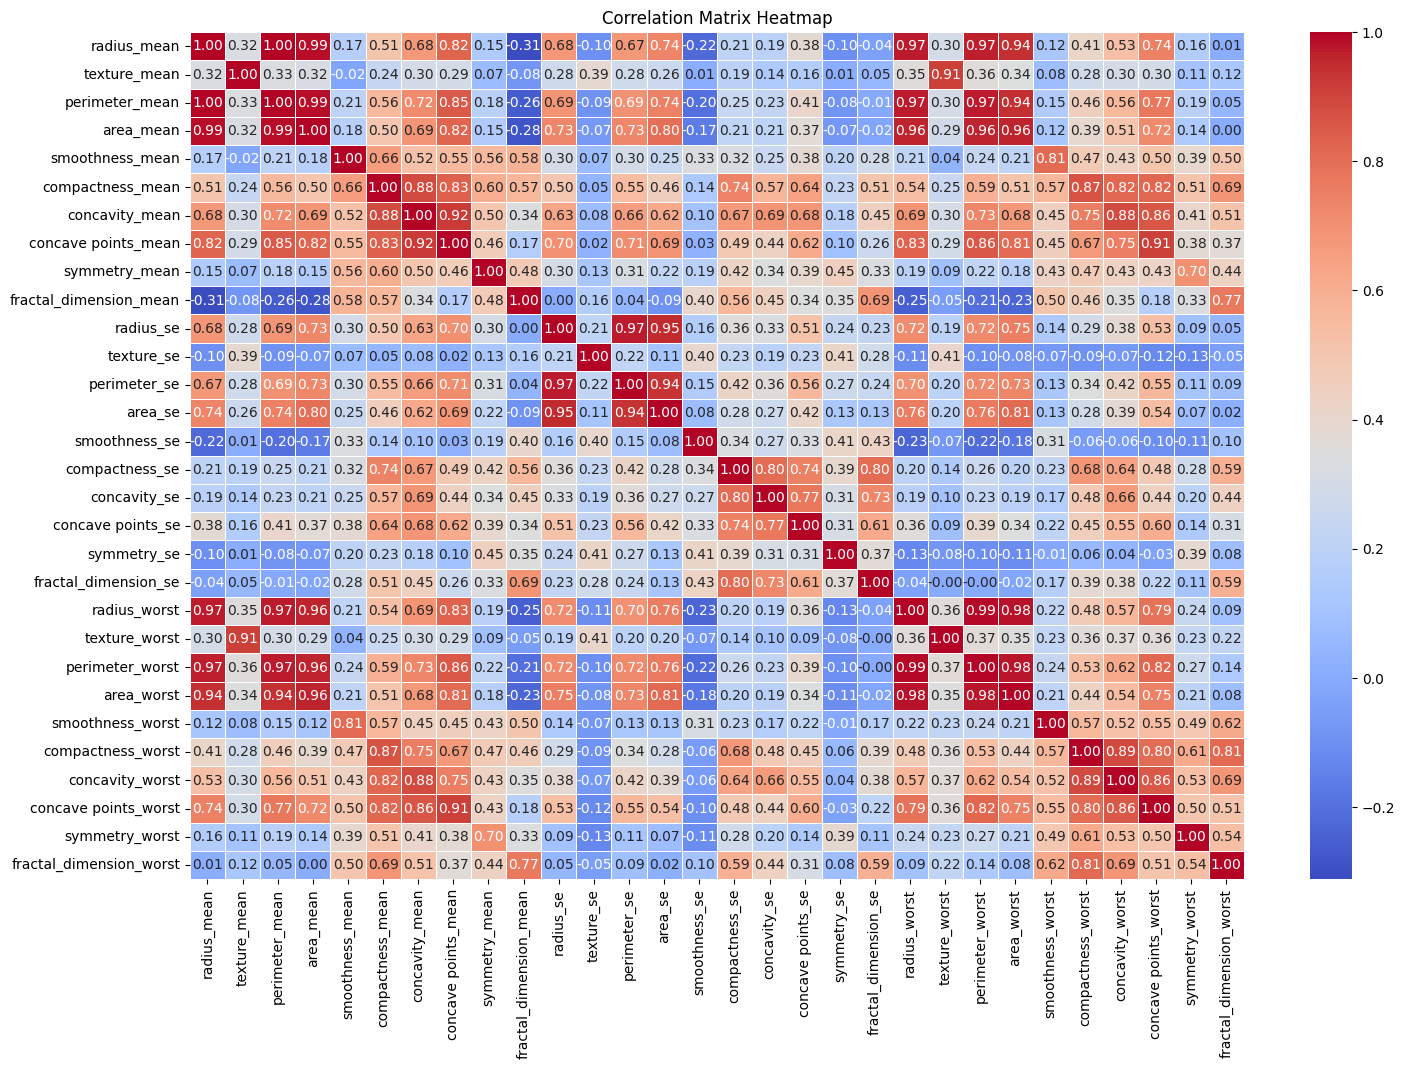

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = features.corr()

# Plot the correlation matrix
plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


removinig features with high correlation

In [7]:
# Set the threshold for high correlation (e.g., 0.9)
threshold = 0.9

# Find features with high correlation
high_corr_var = set()  # To keep track of features to remove

# Loop through the matrix and print correlations that exceed the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            feature_1 = correlation_matrix.columns[i]
            feature_2 = correlation_matrix.columns[j]
            high_corr_var.add(feature_1)
            print(f"Correlation between {feature_1} and {feature_2}: {corr_value:.2f}")


print()
# Drop the highly correlated features from the data
print("Features to be removed:", high_corr_var)
print()
data_cleaned = features.drop(columns=high_corr_var)

# Display the cleaned data
print(data_cleaned)




Correlation between perimeter_mean and radius_mean: 1.00
Correlation between area_mean and radius_mean: 0.99
Correlation between area_mean and perimeter_mean: 0.99
Correlation between concave points_mean and concavity_mean: 0.92
Correlation between perimeter_se and radius_se: 0.97
Correlation between area_se and radius_se: 0.95
Correlation between area_se and perimeter_se: 0.94
Correlation between radius_worst and radius_mean: 0.97
Correlation between radius_worst and perimeter_mean: 0.97
Correlation between radius_worst and area_mean: 0.96
Correlation between texture_worst and texture_mean: 0.91
Correlation between perimeter_worst and radius_mean: 0.97
Correlation between perimeter_worst and perimeter_mean: 0.97
Correlation between perimeter_worst and area_mean: 0.96
Correlation between perimeter_worst and radius_worst: 0.99
Correlation between area_worst and radius_mean: 0.94
Correlation between area_worst and perimeter_mean: 0.94
Correlation between area_worst and area_mean: 0.96
Co

plotting the new correlation matrix

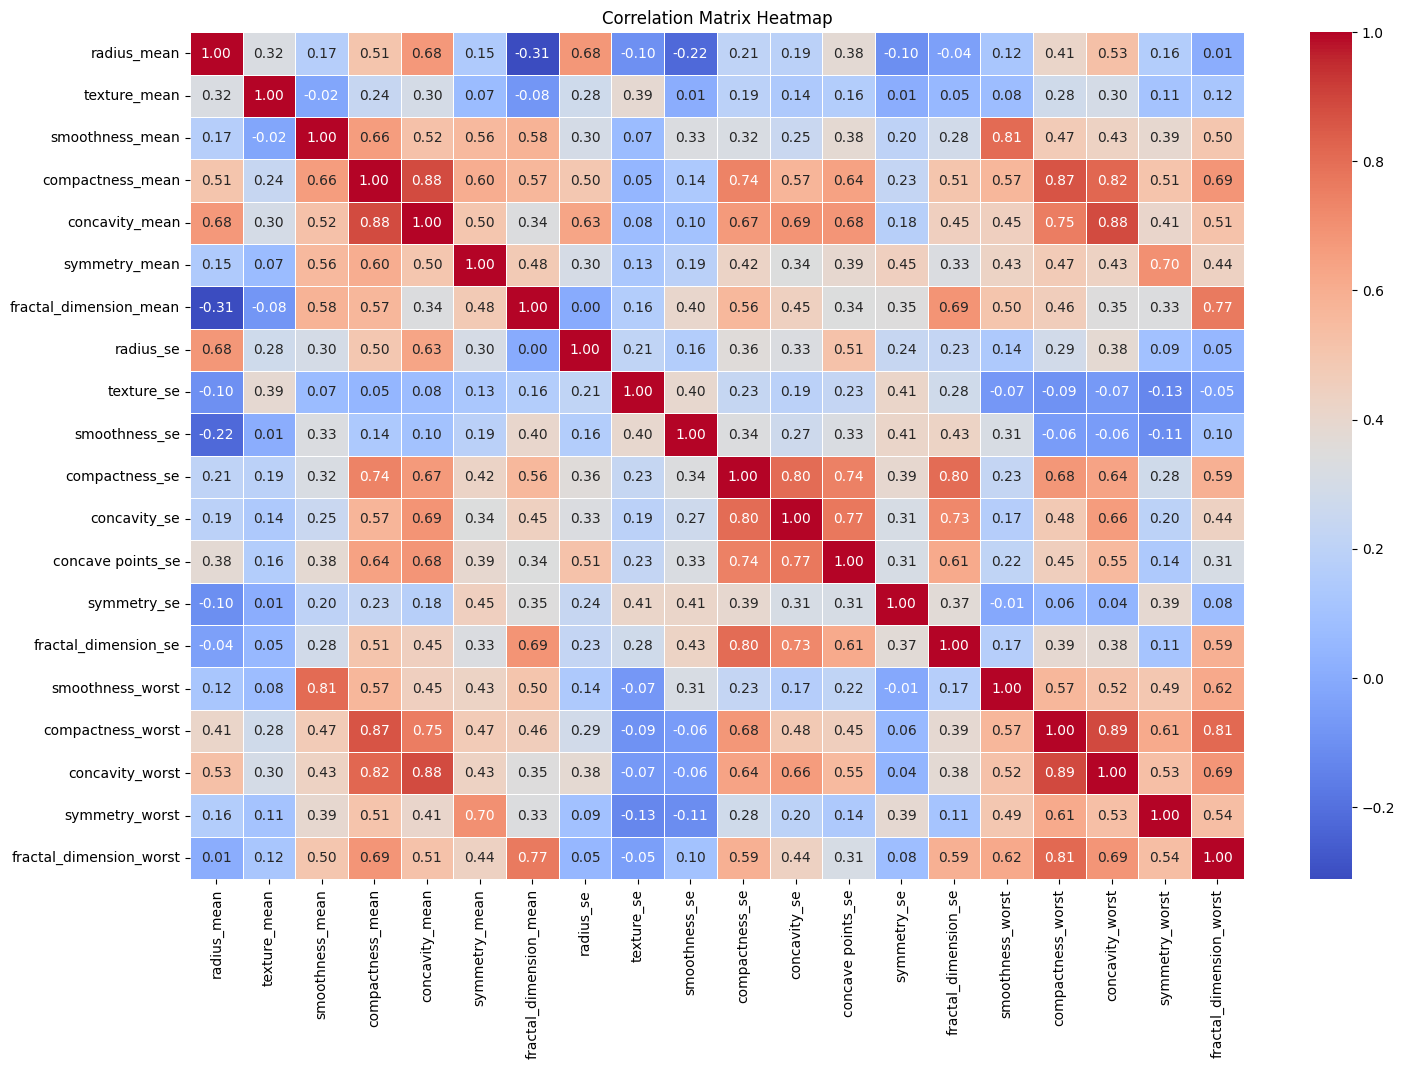

In [8]:
correlation_matrix = data_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

### scatter plot before removing outliers

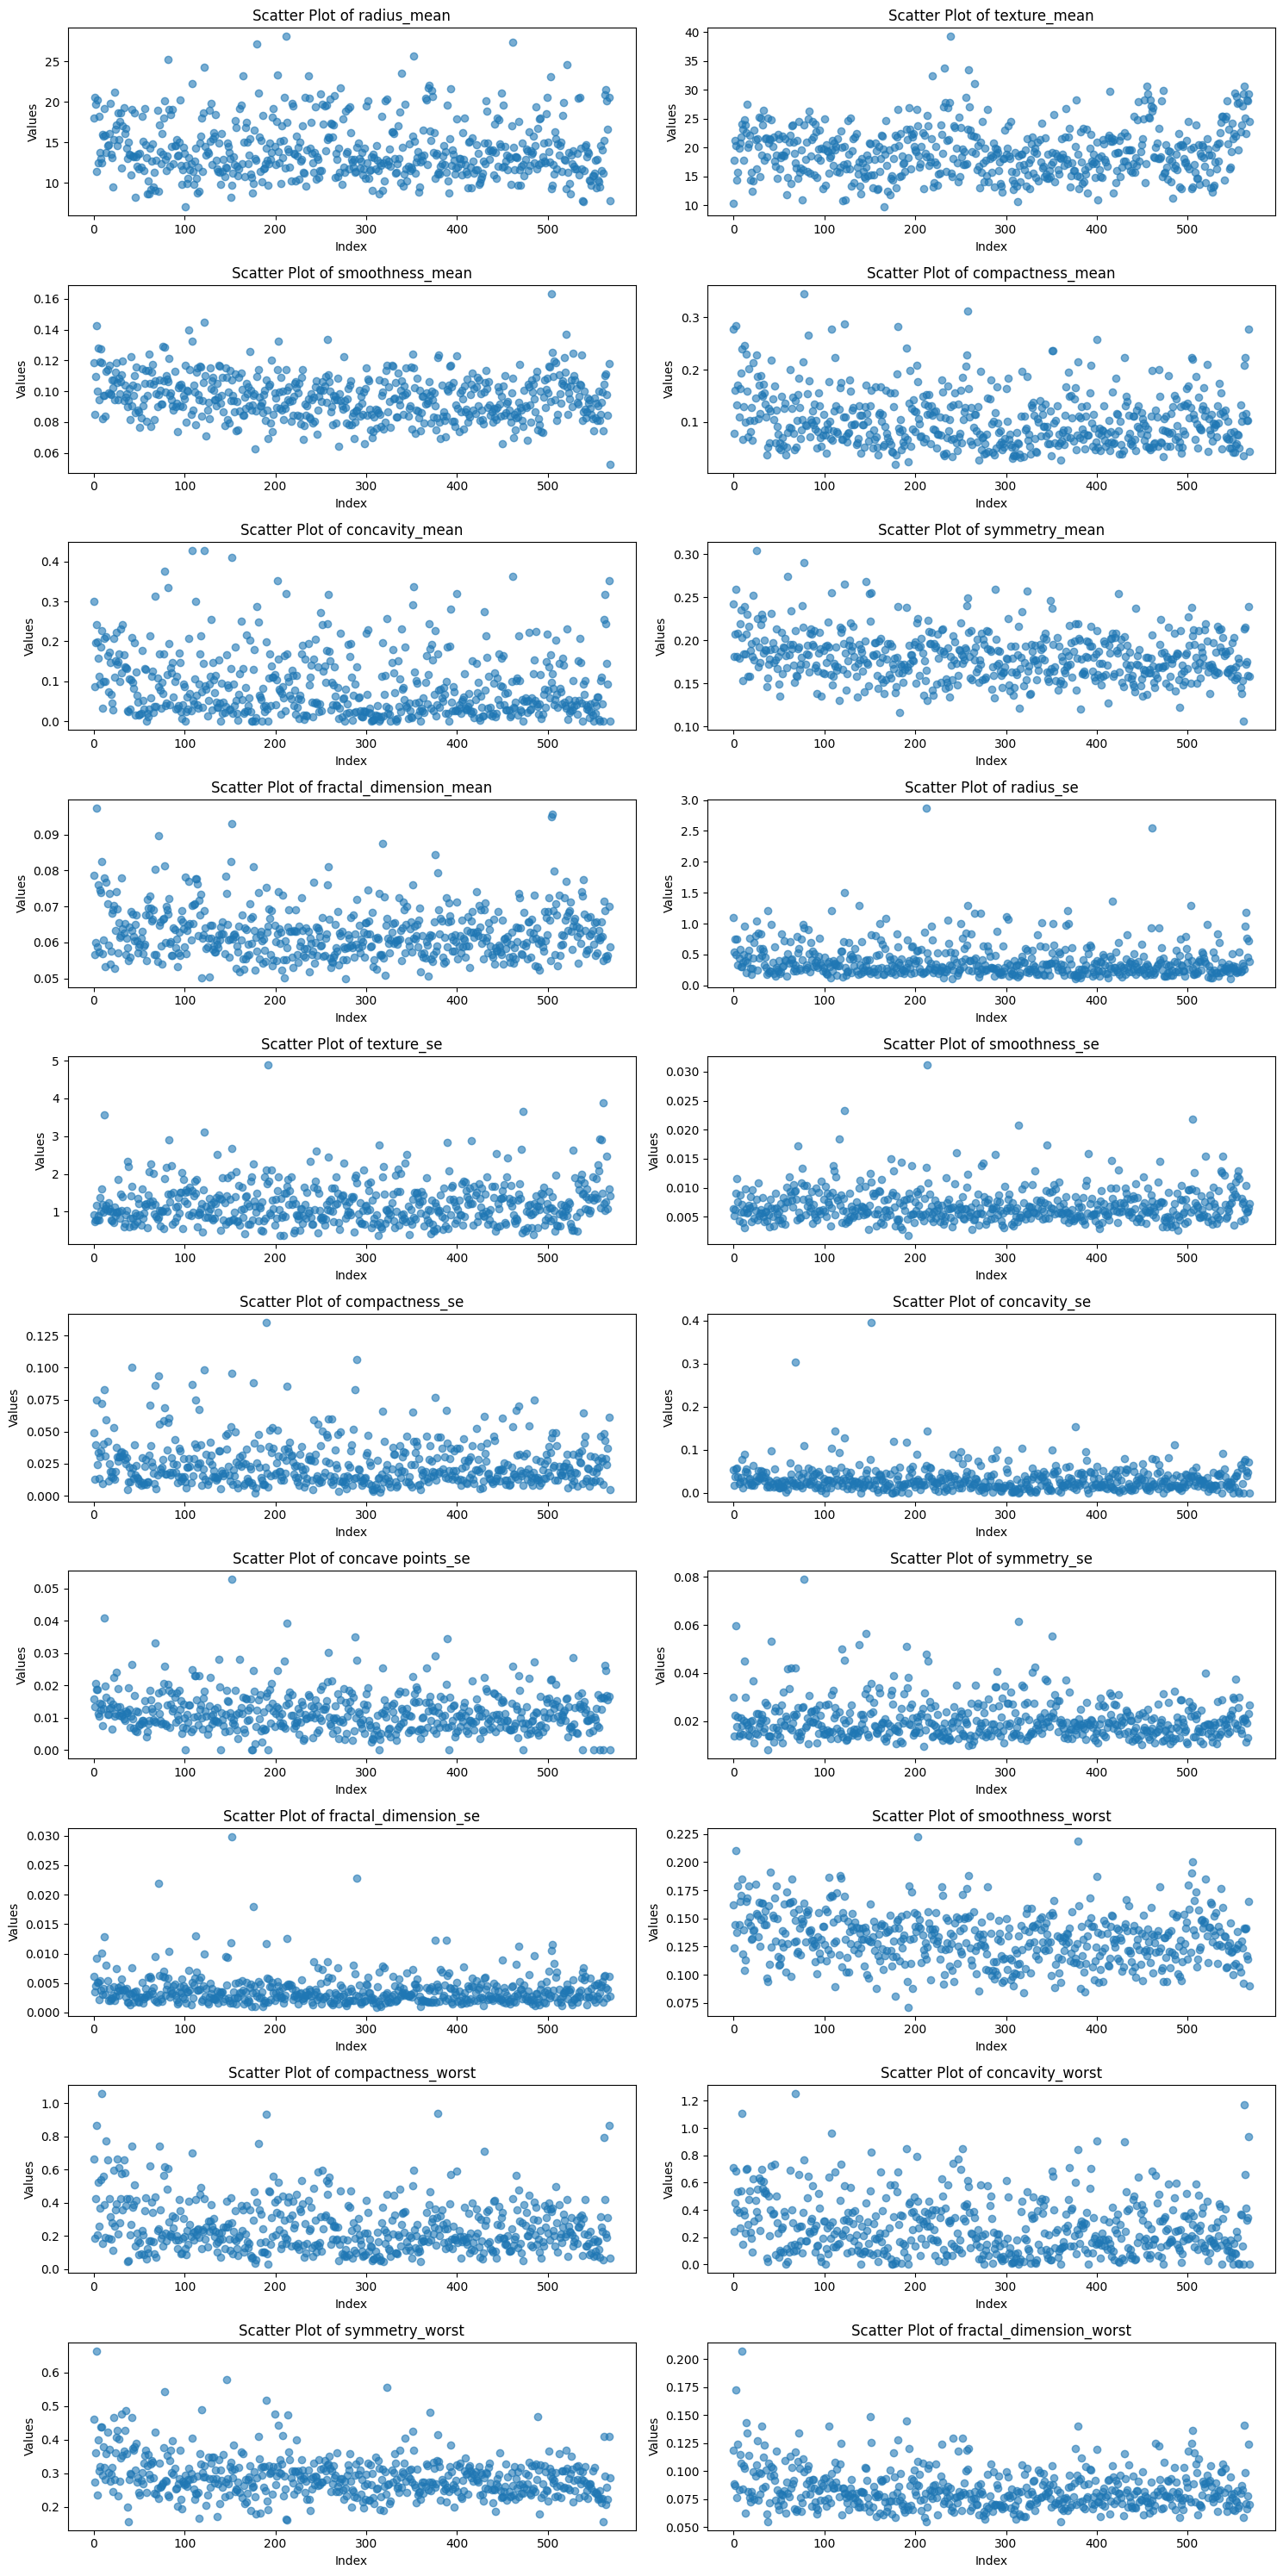

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Features to plot
features = data_cleaned.columns

# Calculate the number of rows and columns
num_features = len(features)
rows = int(np.ceil(num_features / 2))  # Calculate rows
cols = 2  # Fixed number of columns

# Create subplots with dynamic dimensions
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))  # Adjust figure height based on rows

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each feature as a scatter plot
for i, feature in enumerate(features):
    axes[i].scatter(range(len(data_cleaned[feature])), data_cleaned[feature], alpha=0.6)
    axes[i].set_title(f'Scatter Plot of {feature}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Values')

# Remove unused axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete empty subplots

plt.tight_layout()  # Adjust spacing
plt.show()


### outliers

Detect outliers

In [10]:
# Placeholder for storing outliers
outlier_indices = []

# Loop through each feature
for feature in data_cleaned.columns:
    Q1 = data_cleaned[feature].quantile(0.25)  
    Q3 = data_cleaned[feature].quantile(0.75) 
    IQR = Q3 - Q1  # Interquartile range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the feature
    outliers = data_cleaned[(data_cleaned[feature] < lower_bound) | (data_cleaned[feature] > upper_bound)]
    outlier_indices.extend(outliers.index.tolist())  # Collect outlier indices

    # Print outliers for the feature
    print(f"Outliers detected in feature '{feature}':")
    print(outliers)
    print("-" * 50)

# Consolidate all unique outlier indices
unique_outlier_indices = list(set(outlier_indices))
print(f"\nTotal number of unique outlier rows detected: {len(unique_outlier_indices)}")


Outliers detected in feature 'radius_mean':
     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
82         25.22         24.91          0.10630            0.2665   
108        22.27         19.67          0.13260            0.2768   
122        24.25         20.20          0.14470            0.2867   
164        23.27         22.04          0.08439            0.1145   
180        27.22         21.87          0.10940            0.1914   
202        23.29         26.67          0.11410            0.2084   
212        28.11         18.47          0.11420            0.1516   
236        23.21         26.97          0.09509            0.1682   
339        23.51         24.27          0.10690            0.1283   
352        25.73         17.46          0.11490            0.2363   
369        22.01         21.90          0.10630            0.1954   
461        27.42         26.27          0.10840            0.1988   
503        23.09         19.83          0.09342            

In [11]:
# Remove outliers from the dataset
feature_cleaned = data_cleaned.drop(index=unique_outlier_indices)
label_cleaned = label.loc[feature_cleaned.index]  # Keep target variable consistent

# Display shapes after removing outliers
print(f"Original data shape: {data_cleaned.shape}")
print(f"Cleaned data shape: {feature_cleaned.shape}")


Original data shape: (569, 20)
Cleaned data shape: (426, 20)


### Scatter plot after removing outliers

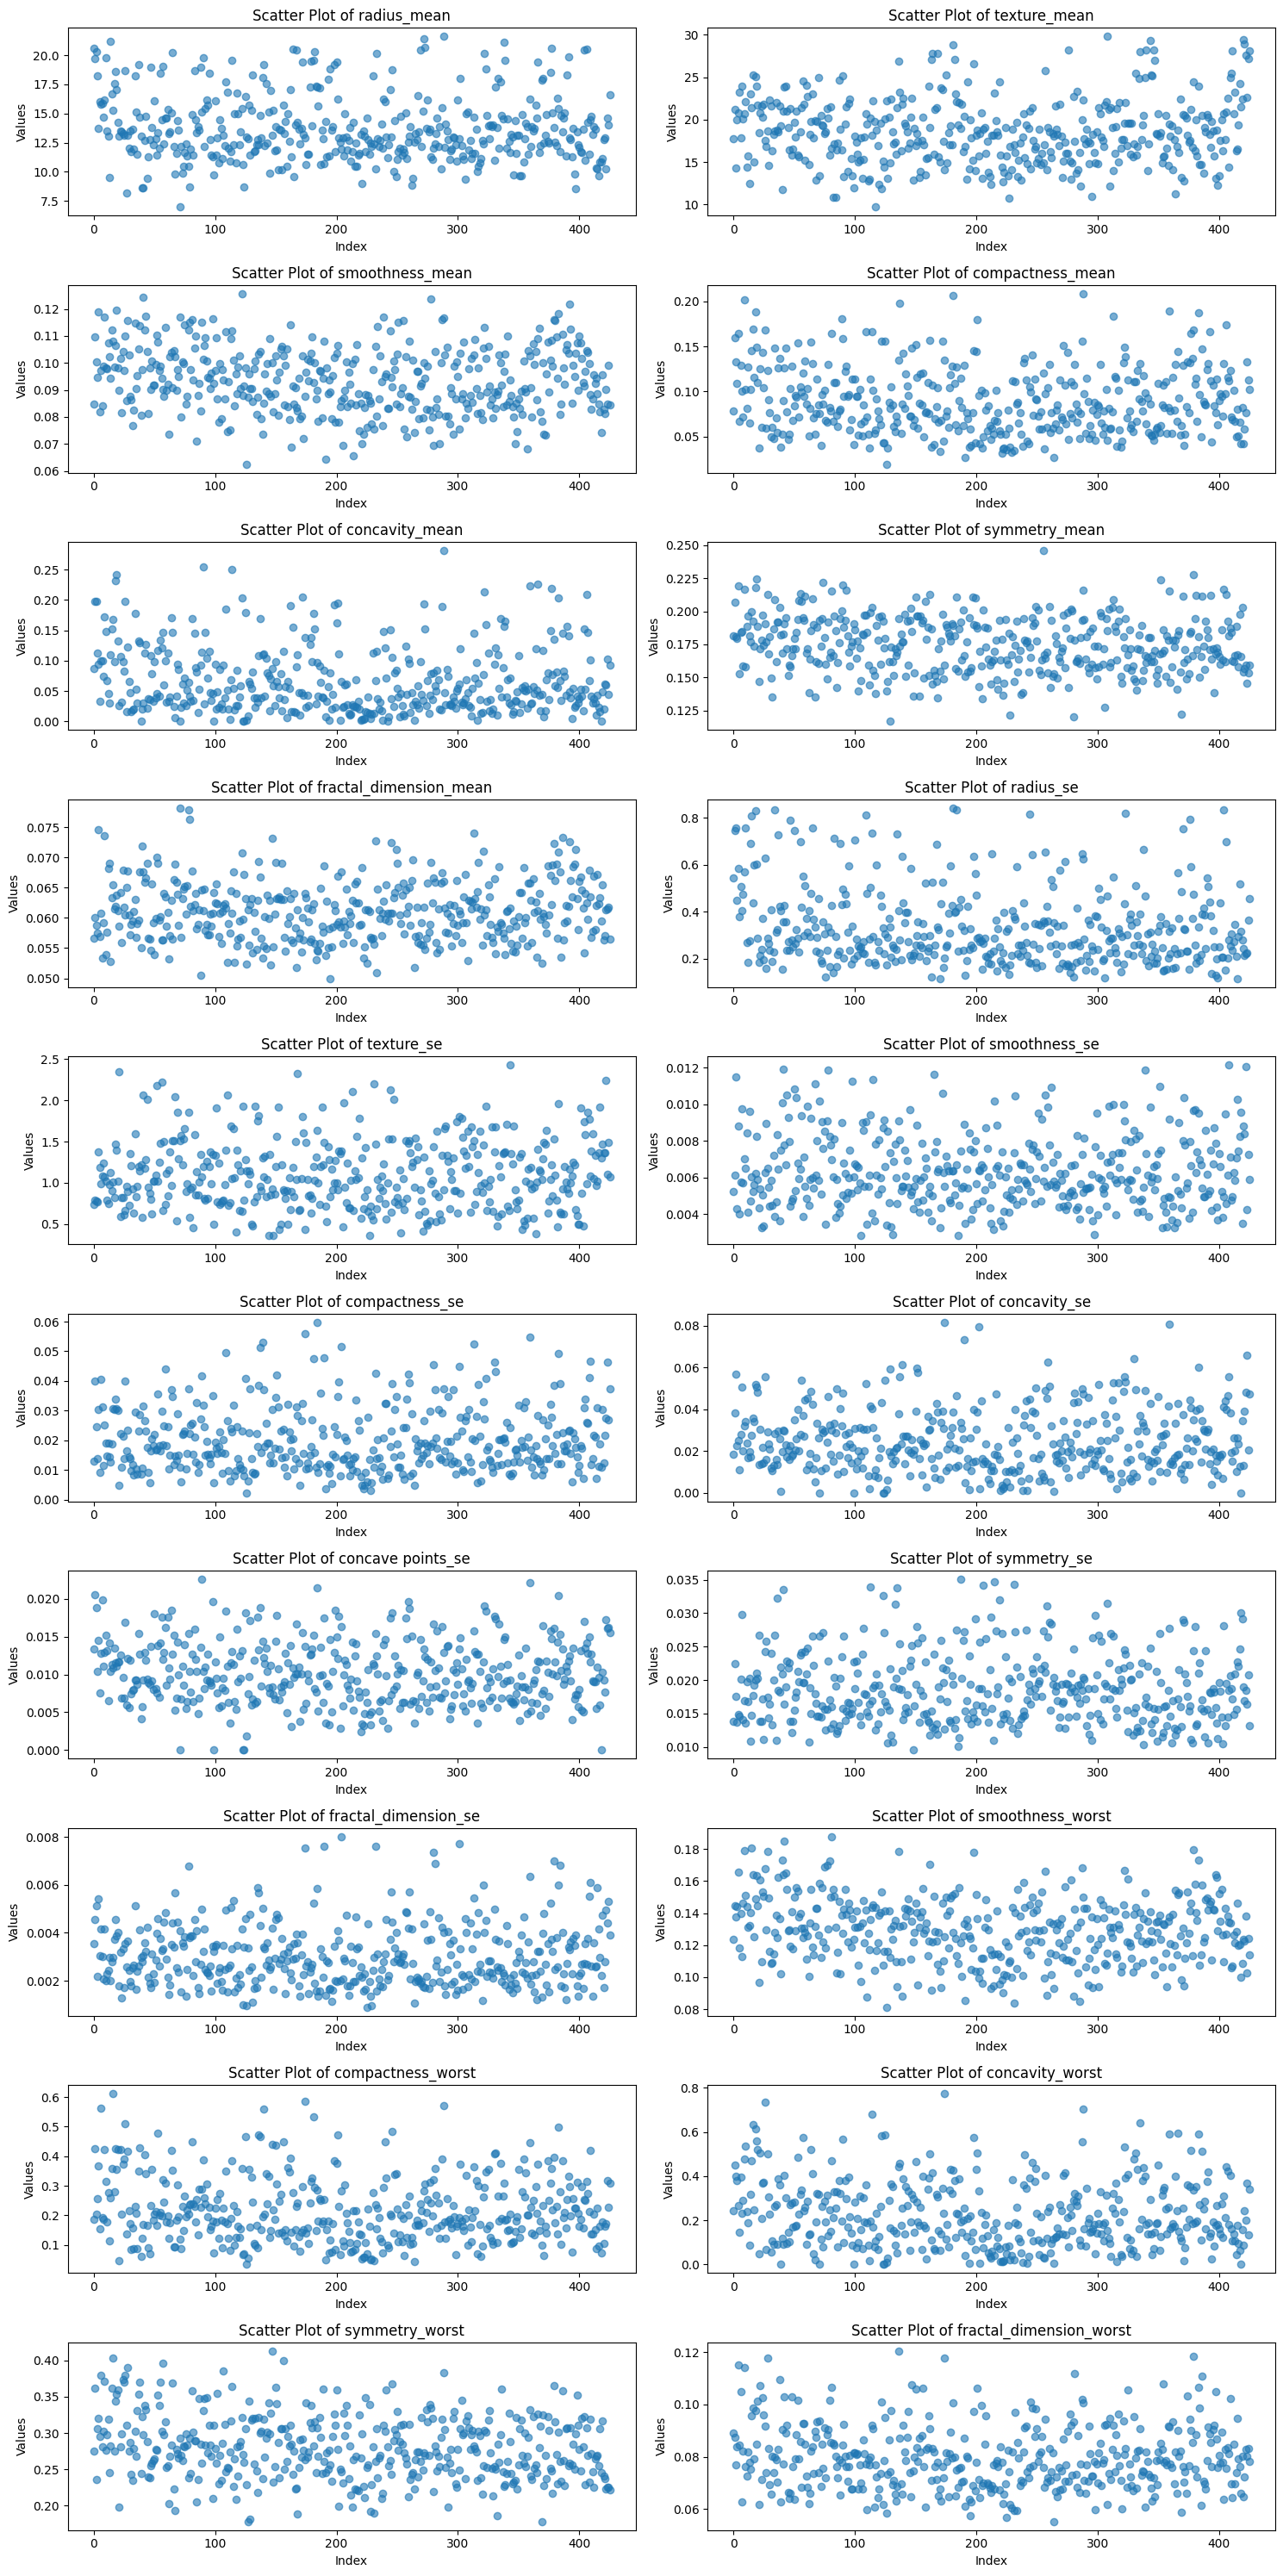

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Features to plot
features = feature_cleaned.columns  # Assuming `X_cleaned` is the cleaned input data

# Calculate the number of rows and columns
num_features = len(features)
rows = int(np.ceil(num_features / 2))  # Calculate rows
cols = 2  # Fixed number of columns

# Create subplots with dynamic dimensions
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))  # Adjust figure height based on rows

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each feature as a scatter plot
for i, feature in enumerate(features):
    axes[i].scatter(range(len(feature_cleaned[feature])), feature_cleaned[feature], alpha=0.6)
    axes[i].set_title(f'Scatter Plot of {feature}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Values')

# Remove unused axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete empty subplots

plt.tight_layout()  # Adjust spacing
plt.show()


### Saving the data in CSV file

In [13]:
# Combine X_cleaned and y_cleaned for a complete dataset
cleaned_data = pd.concat([feature_cleaned, label_cleaned], axis=1)

# Save the cleaned dataset to a CSV file
cleaned_data.to_csv("cleaned_breast_cancer_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_breast_cancer_data.csv'.")


Cleaned dataset saved as 'cleaned_breast_cancer_data.csv'.
